In [288]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

df = pd.read_csv("./shopping.csv")

df["주문일자"] = pd.to_datetime(df["주문일자"])

df["month"] = df["주문일자"].dt.month
df["year"] = df["주문일자"].dt.year

df = df.rename({"판매금액": "sales amount"}, axis=1)

print(df.head())

              주문번호                     구매자                          상품명  \
0  191213170236874  Brown, Woods and Yoder    eHBM셀파수학교실 비닐봉투-1세트 100장입   
1  191216100347429  Brown, Woods and Yoder    eHBM셀파수학교실 비닐봉투-1세트 100장입   
2  191216100347429  Brown, Woods and Yoder     eHBM셀파수학교실 삼색볼펜-1세트 50개입   
3  191216173241622  Brown, Woods and Yoder  eHBM셀파수학교실 회원용 리플렛-1세트 50권입   
4  191216173241622  Brown, Woods and Yoder      eHBM셀파수학교실-학습계통도(중등 5종)   

   sales amount  결제방법                주문일자  처리상태  month  year  
0          5000  신용카드 2019-12-13 17:03:37  구매확정     12  2019  
1          5000  신용카드 2019-12-16 10:04:50  구매확정     12  2019  
2         67500  신용카드 2019-12-16 10:04:50  구매확정     12  2019  
3         30000  신용카드 2019-12-16 17:33:43  구매확정     12  2019  
4           750  신용카드 2019-12-16 17:33:43  구매확정     12  2019  


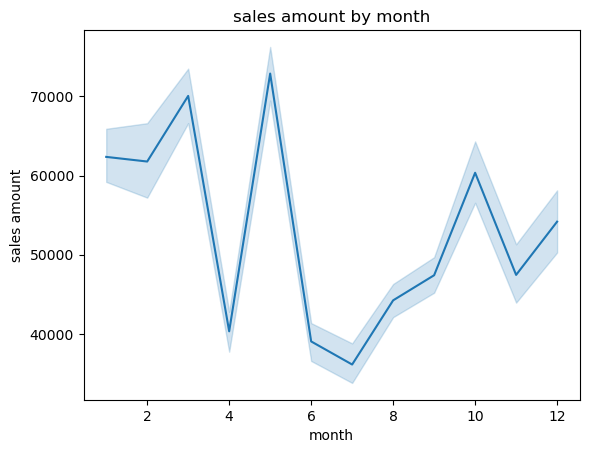

In [289]:
sns.lineplot(
    data=df,
    x="month",
    y="sales amount",
)
plt.title("sales amount by month")
plt.show()

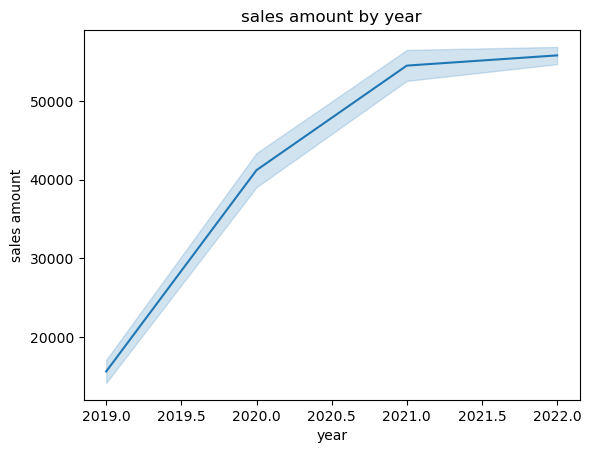

In [290]:
sns.lineplot(data=df, x="year", y="sales amount")
plt.title("sales amount by year")
plt.show()

In [291]:
group = df.groupby("상품명")


cus_sum = group["구매자"].unique().tolist()
group_sum = (
    group["sales amount"].sum().sort_values(ascending=False).head(3).index.tolist()
)

m, n = [], []

for i in range(len(group_sum)):
    m.append(df.loc[(df["상품명"] == group_sum[i]), "구매자"].count())
    n.append(str(df.loc[(df["상품명"] == group_sum[i]), "구매자"].unique()))


fig = px.bar(
    data_frame=df,
    x=group_sum,
    y=m,
    color=n,  # == hue
)

fig.update_layout(
    title="판매금액 TOP3 상품에 대한 구매자 분포도",
    xaxis_title="상품",
    yaxis_title="판매 개수",
)

fig.show()

In [292]:
df2 = pd.read_csv("./RFM_result.csv")

# print(df2.loc[df2["grade"] == "VIP", "구매자"])

df.loc[df["구매자"] == "Bond and Sons", "상품명"]

r = pd.DataFrame(df.loc[df["구매자"] == "Bond and Sons", "상품명"].unique())

plt.figure(figsize=(20, 10))

fig = px.bar(
    data_frame=df,
    x=df.loc[df["구매자"] == "Bond and Sons", "상품명"].value_counts().index,
    y=df.loc[df["구매자"] == "Bond and Sons", "상품명"].value_counts().values,
)

fig.update_layout(
    title="vip 'Bond and Sons'의 구매 물품 분포도",
    xaxis_title="상품",
    yaxis_title="판매 개수",
)

fig.show()

<Figure size 2000x1000 with 0 Axes>